# Detección MAP y ML para función de distribución de Poisson (canal de fibra óptica)
1) Grafique en una misma figura las probabilidades condicionales P(Y|H) para H=0 y H=1 del Ejemplo 2.4 del libro. Elija parámetros para la función de densidad de Poisson y saque conclusiones

2) Genere una distribución de Poisson y realice su histograma

3) Determine las regiones de decisión MAP y ML. Para el caso MAP, proponga una distribución de probabilidad de las hipótesis

4) Estime estadísticamente la probabilidad error y realice una gráfica de probabilidad de error vs SNR[DB]

(array([2.5530e+03, 0.0000e+00, 0.0000e+00, 7.4820e+03, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.1136e+04, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.1248e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        8.4170e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 4.9800e+03,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 2.5470e+03, 0.0000e+00,
        0.0000e+00, 1.0710e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        3.7000e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.4100e+02,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 3.9000e+01, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.1000e+01, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 4.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0.  ,  0.26,  0.52,  0.78,  1.04,  1.3 ,  1.56,  1.82,  2.08,
         2.34,  2.6 ,  2.86,  3.12,  3.38,  3.64,  3.9 ,  4.16,  4.42,
         4.68,  4.94,  5.2 ,  5.46,  5.72,  5.98,  6.24,  6.5 ,  6.76,
         7.02,  7.28,  7.54,  7.8 ,  8.06,  8.32,  8.58,  8.84,  9.1 ,
         9.36,  9.62,  9.88, 10.14

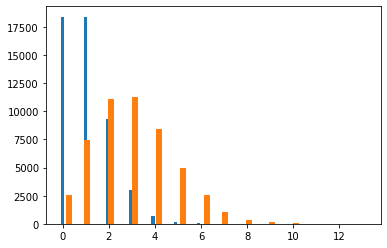

In [ ]:
import numpy as np
import matplotlib as plt

lambda0 = 1 
lambda1 = 3
nb_samples = 50000

# Analizando la estadística
signal_received_h0 =  np.random.poisson(lambda0, nb_samples)
signal_received_h1 = np.random.poisson(lambda1, nb_samples)

plt.pyplot.hist(signal_received_h0,50,align='left')
plt.pyplot.hist(signal_received_h1,50,align='right')


El criterio de decisión para el caso ML es para lambda0=1 y lambda1=3 $$y\gt 1 \Rightarrow \hat{H}=1 \\ y\le 1 \Rightarrow \hat{H}=0$$

In [ ]:
# Simulador de hipotesis + canal + receptor
# GENERADOR DE HIPOTESIS
hypothesis = np.random.randint(0,2,nb_samples)
# SALIDA DEL CANAL 
y = [np.random.poisson(lambda1) if hypothesis[i]>0 else np.random.poisson(lambda0) for i in range(nb_samples)]
# RECEPTOR 
nivel = 1
hypothesis_detected = [1 if y[i]>nivel else 0 for i in range(nb_samples)]

pe = sum(abs(hypothesis - np.array(hypothesis_detected)))/nb_samples
print(pe)

0.23102


## Pe vs SNR
Sea y la cantidad de fotones a la salida del foto detector. La media y varianza está dada por $$\mu = E\{y\}=\sum_{y=0}yp(y)=\sum_{y=0}yp(y/ho)p(ho)+\sum_{y=0}yp(y/h1)p(h1)=\lambda_o p(ho)+\lambda_1p(h1)$$
$$\sigma^2=E\{(y-\mu)^2\}=\lambda_o p(ho)+\lambda_1p(h1)$$
De este modo, la relación entre la potencia de la señal $\mu^2$ y su varianza (ruido) está dada por
$$SNR = \frac{\mu^2}{\sigma^2}=\lambda_o p(ho)+\lambda_1p(h1)$$

[3.352e-01 2.326e-01 1.024e-01 2.996e-02 4.980e-03 2.400e-04]


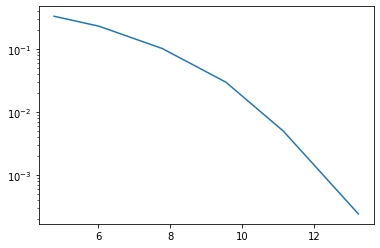

In [ ]:
# Las diferentes SNR se generan variando lambda1
import numpy as np
import matplotlib as plt

lambda1 = np.array([2, 3, 5, 8, 12, 20])
snrdB = 10*np.log10(lambda0 + lambda1)
ber = np.array([])
lambda0 = 1
for lambdaX in lambda1:
  # SALIDA DEL CANAL 
  y = [np.random.poisson(lambdaX) if hypothesis[i]>0 else np.random.poisson(lambda0) for i in range(nb_samples)]
  # RECEPTOR 
  nivel =  (lambdaX-lambda0)/np.log(lambdaX/lambda0)
  hypothesis_detected = [1 if y[i]>nivel else 0 for i in range(nb_samples)]
  ber = np.append(ber, sum(abs(np.array(hypothesis_detected) - hypothesis))/nb_samples)
print(ber)

plt.pyplot.semilogy(snrdB,ber)